<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment_2/Ass2Data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Import and Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/Contraceptive%20Method%20Choice%20Data%20Set/ContraceptiveMethodChoiceDataSet.csv',names=['Wife Age','Wife Education','Husband Education','Number of Children','Wife religion','Wife working','Husband Occupation','SOLI','Media Exposure','Contraceptive Method'] ,sep=',', quotechar='"')

In [6]:
df

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [10]:
#Check if there needs to be any preprocessing done
df.describe()
#There is no need to do preprocessing as the data has a small mean and standard deviation.

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [8]:
df.info()
#checked if there is missing values from the coloumn
#1473 entries lot of data, 10 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife Age              1473 non-null   int64
 1   Wife Education        1473 non-null   int64
 2   Husband Education     1473 non-null   int64
 3   Number of Children    1473 non-null   int64
 4   Wife religion         1473 non-null   int64
 5   Wife working          1473 non-null   int64
 6   Husband Occupation    1473 non-null   int64
 7   SOLI                  1473 non-null   int64
 8   Media Exposure        1473 non-null   int64
 9   Contraceptive Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [12]:
#Double check if there is missing values
df.isnull().any().sum()>0

False

####Adding ID for each wife


In [13]:
ID=np.array(range(len(df)))

df['ID']=ID

print(df)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     1     0
1           45               1  ...                     1     1
2           43               2  ...                     1     2
3           42               3  ...                     1     3
4           36               3  ...                     1     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     3  1468
1469        33               4  ...                     3  1469
1470        39               3  ...                     3  1470
1471        33               3  ...                     3  1471
1472        17               3  ...                     3  1472

[1473 rows x 11 columns]


#### Changing the Target Class to Binary Representation

In [15]:
df['Contraceptive Method'].value_counts()

1    629
3    511
2    333
Name: Contraceptive Method, dtype: int64

In [16]:
# binary classification 0 is not used and 1 is used contraceptive 1 is either short or long contraceptive used
df['Contraceptive Method']=[0 if b== 1 else 1 for b in df['Contraceptive Method']]
df['Contraceptive Method'].value_counts()

1    844
0    629
Name: Contraceptive Method, dtype: int64

In [18]:
#Check if it worked
print(df)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     0     0
1           45               1  ...                     0     1
2           43               2  ...                     0     2
3           42               3  ...                     0     3
4           36               3  ...                     0     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     1  1468
1469        33               4  ...                     1  1469
1470        39               3  ...                     1  1470
1471        33               3  ...                     1  1471
1472        17               3  ...                     1  1472

[1473 rows x 11 columns]


###Checking the imbalance

###Bar Graph for distribution
##The distributions shows how skewed these features are. 

In [0]:
#Function to plot bar chart
def barchart(title,label,data,hue):
  plt.title(title,fontsize=14)
  sns.countplot(label,data=data,hue=hue)

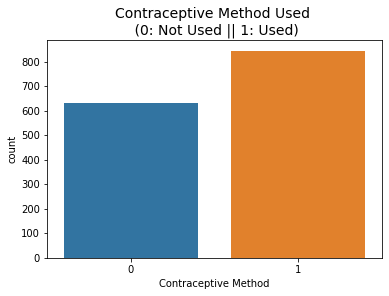

In [28]:
###Bar Graph for distribution
barchart('Contraceptive Method Used \n (0: Not Used || 1: Used)',"Contraceptive Method",df,None)

This shows the use of contraceptives is higher than no use.

###Pie Chart Representing Percentage of Imbalance


In [23]:
noused= len(df[df['Contraceptive Method']==0])
used=len(df[df['Contraceptive Method']==1])

percentofnoused= noused/(used+noused)
percentofused=used/(used+noused)

print("Percentage of No Use is", percentofnoused*100)
print("Percentage of used is", percentofused*100)

Percentage of No Use is 42.701968771215206
Percentage of used is 57.298031228784794


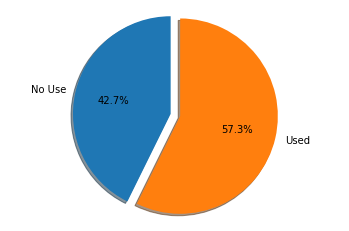

In [24]:
labels = 'No Use','Used'

sizes=[percentofnoused,percentofused]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

###Inspection of Dataset

In [0]:
#function to plot distribution

def hist(title,data ,bins,kde):
  
  plt.figure(figsize=(10,6))
  plt.title(title,fontsize=14)
  sns.distplot(data,bins=bins,kde=kde)
  

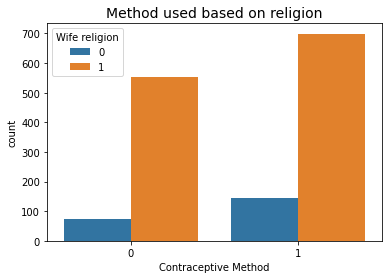

In [29]:
#Contraceptive used based on relgion 0 being non islam and 1 being islam
barchart('Method used based on religion',"Contraceptive Method",df,"Wife religion")

This shows that people with faith of islam have used contraceptive more than non islam people and not used as well.

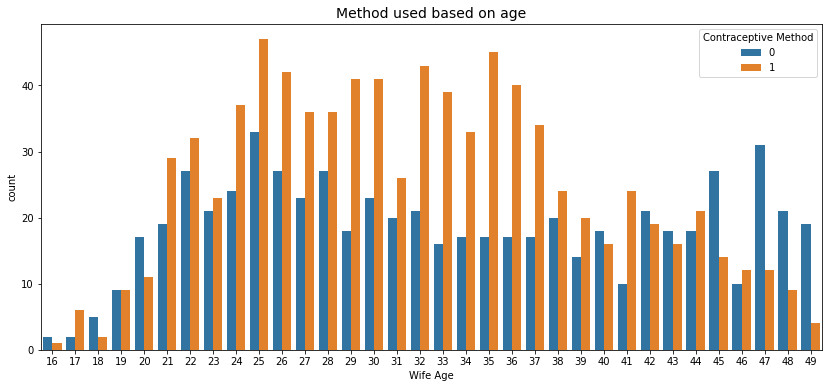

In [33]:
plt.figure(figsize=(14,6))
barchart('Method used based on age',"Wife Age",df,"Contraceptive Method")

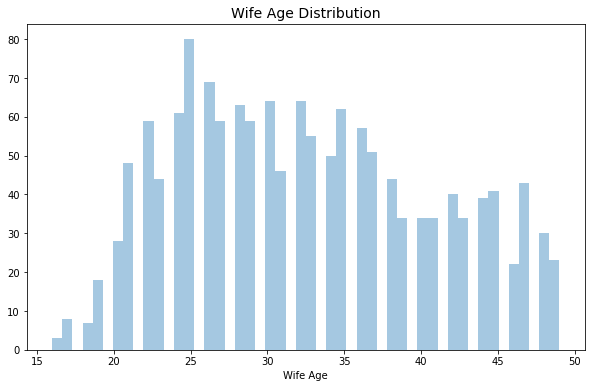

In [59]:
#distribution of the wifes ages
hist('Wife Age Distribution',df['Wife Age'],50,None)

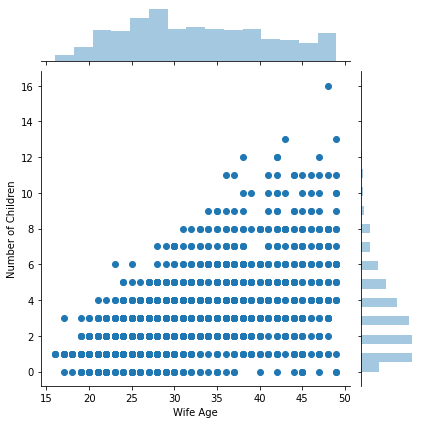

In [46]:
sns.jointplot(x='Wife Age',y='Number of Children',data=df)

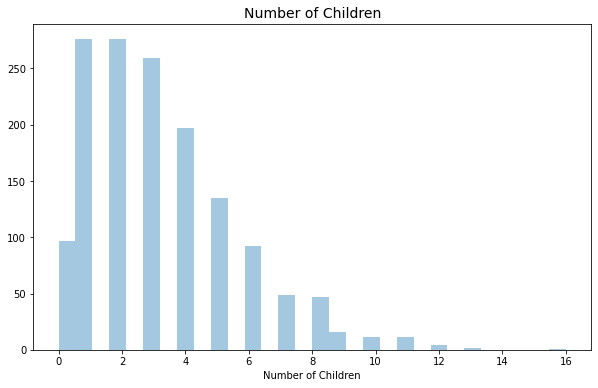

In [58]:
hist('Number of Children',df['Number of Children'],30,False)

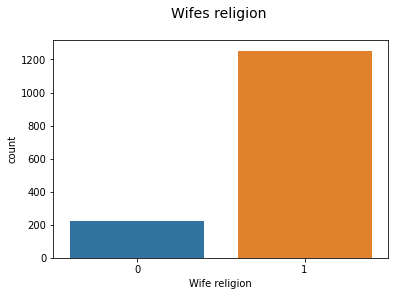

In [60]:
barchart('Wifes religion \n',"Wife religion",df,None)

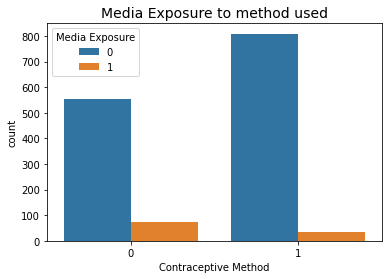

In [63]:
barchart('Media Exposure to method used','Contraceptive Method',df,"Media Exposure")

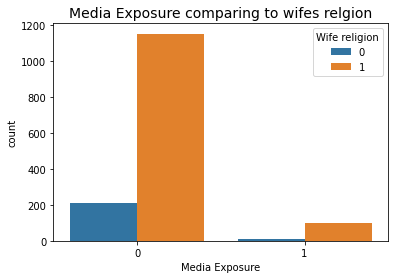

In [62]:
barchart('Media Exposure comparing to wifes relgion','Media Exposure',df,"Wife religion")

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
#Function to establish a baseline
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))

In [0]:
x=df.drop('Contraceptive Method', axis=1) ##Predictors
y=df['Contraceptive Method'] ## Target variable


In [73]:
#Using the Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=0)
baseline(decclf,x,y)

Accuracy: [0.70945946 1.         1.         1.         1.         1.
 0.68027211 1.         1.         0.78911565]
Precision: [1.         1.         1.         1.         1.         1.
 0.75342466 1.         1.         0.73275862]
Recall: [0.49411765 1.         1.         1.         1.         1.
 0.6547619  1.         1.         1.        ]
F1 Score: [0.66141732 1.         1.         1.         1.         1.
 0.70063694 1.         1.         0.84577114]
Average Accuracy: 0.92 (+/- 0.26)
Average Precision: 0.95 (+/- 0.21)
Average Recall: 0.91 (+/- 0.35)
Average F1 Score: 0.92 (+/- 0.26)


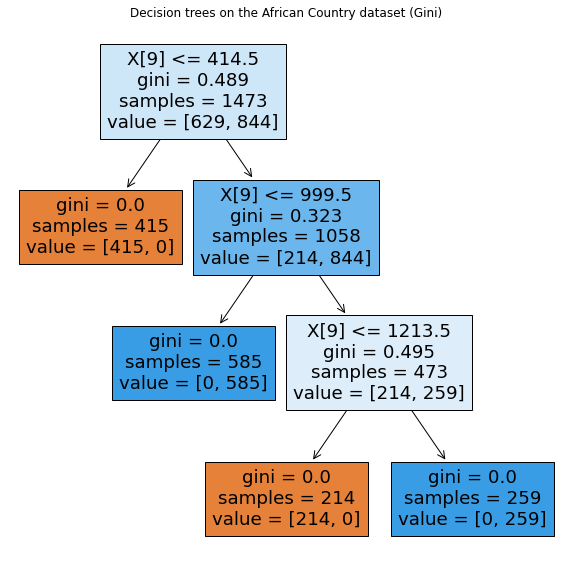

In [75]:
# Decision Tree graph
plt.figure(figsize=(10,10))
plottree=plot_tree(decclf.fit(x, y),filled=True)
plt.title("Decision trees on the African Country dataset (Gini)")
plt.show()


In [76]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

Accuracy: [0.70945946 1.         1.         1.         1.         1.
 0.70748299 0.95238095 0.99319728 0.85034014]
Precision: [1.         1.         1.         1.         1.         1.
 0.8        1.         1.         0.80769231]
Recall: [0.49411765 1.         1.         1.         1.         1.
 0.67857143 0.92857143 1.         0.98823529]
F1 Score: [0.66141732 1.         1.         1.         1.         1.
 0.7388535  0.94339623 1.         0.87958115]
Average Accuracy: 0.92 (+/- 0.23)
Average Precision: 0.96 (+/- 0.16)
Average Recall: 0.91 (+/- 0.34)
Average F1 Score: 0.92 (+/- 0.24)
